In [159]:
#Este notebook contiene el código utilizado para el análisis de la Base "Base_ID.txt". Contiene la explicación de
#los pasos llevados a cabo para solucionar el problema analíticamente.

#Se importan las librerías que serán utilizadas para resolver el problema.
import pandas as pd
import numpy as np
from datetime import datetime

#Se cargan los datos y se asigna a una variable, se imprimen los tipos de datos, para empezar a entender los datos
#que componen la base de datos.
Base_ID=pd.read_csv('YPD_LuisBuitragoR/BASE_ID.txt',delimiter='\t',infer_datetime_format=True)
print (Base_ID.dtypes)
print (Base_ID.head())


CLIENTE_CC            object
FECHA_ALTA            object
FECHA_NACIMIENTO      object
SEXO                  object
ESTADO_CIVIL          object
SITUACION_LABORAL     object
fuga                 float64
MES_DE_FUGA           object
dtype: object
  CLIENTE_CC FECHA_ALTA FECHA_NACIMIENTO    SEXO ESTADO_CIVIL  \
0       1,00  sep301996         19300823       F       CASADO   
1       2,00  may011986         19530630  HOMBRE  UNION LIBRE   
2       3,00  dic011994         19540721       F  UNION LIBRE   
3       4,00  ago271997         19390503       M       CASADO   
4       5,00  jul211997         19311013       F       CASADO   

    SITUACION_LABORAL  fuga MES_DE_FUGA  
0               otros   1.0           2  
1       Contrato fijo   NaN         NaN  
2               OTROS   1.0          11  
3               OTROS   NaN         NaN  
4  contrato autonomo.   NaN         NaN  


In [160]:
# Entendiendo las columnas que componen el dataframe recién creado, se pueden quitar los decimales de Cliente_CC
Base_ID['CLIENTE_CC']=Base_ID['CLIENTE_CC'].astype(str)
Base_ID['CLIENTE_CC']=Base_ID['CLIENTE_CC'].map(lambda x: str(x)[:-3])
print (Base_ID.head())

  CLIENTE_CC FECHA_ALTA FECHA_NACIMIENTO    SEXO ESTADO_CIVIL  \
0          1  sep301996         19300823       F       CASADO   
1          2  may011986         19530630  HOMBRE  UNION LIBRE   
2          3  dic011994         19540721       F  UNION LIBRE   
3          4  ago271997         19390503       M       CASADO   
4          5  jul211997         19311013       F       CASADO   

    SITUACION_LABORAL  fuga MES_DE_FUGA  
0               otros   1.0           2  
1       Contrato fijo   NaN         NaN  
2               OTROS   1.0          11  
3               OTROS   NaN         NaN  
4  contrato autonomo.   NaN         NaN  


In [161]:
#Para organizar fecha Alta, se divide en mes, día y año, para reemplazar los caracteres de meses por números
#El objetivo de esto es poder convertirlo a formato de fecha para su posterior análisis. 

fecha_alta=Base_ID['FECHA_ALTA']
mes_fecha_alta=fecha_alta.map(lambda x:str(x)[0:3])
dia_fecha_alta=fecha_alta.map(lambda x:str(x)[3:5])
año_fecha_alta=fecha_alta.map(lambda x:str(x)[5:])
months=('ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic')
months2=(1,2,3,4,5,6,7,8,9,10,11,12)

#Después de reemplazar todo por números, se vuelve a unir la cadena de caracteres, para después convertir a formato de fecha
mes_fecha_alta=mes_fecha_alta.replace(months,months2)
fecha1= mes_fecha_alta.astype(str).str.cat(dia_fecha_alta.astype(str), sep='-')
Base_ID['FECHA_ALTA']=fecha1.str.cat(año_fecha_alta.astype(str), sep='-')

#El antes de como queda esta columna
print(Base_ID['FECHA_ALTA'].head())
Base_ID['FECHA_ALTA'] = pd.to_datetime(Base_ID['FECHA_ALTA'], format='%m-%d-%Y')

#El después de como quedó esta columna
print(Base_ID['FECHA_ALTA'].head())

0     9-30-1996
1     5-01-1986
2    12-01-1994
3     8-27-1997
4     7-21-1997
Name: FECHA_ALTA, dtype: object
0   1996-09-30
1   1986-05-01
2   1994-12-01
3   1997-08-27
4   1997-07-21
Name: FECHA_ALTA, dtype: datetime64[ns]


In [162]:
#Se realiza el mismo procedimiento que para FECHA_ALTA
fecha_nacimiento=Base_ID['FECHA_NACIMIENTO']

#Se reemplaza el valor que no está en el formato, por un número aleatorio, en este caso mi fecha de nacimiento para recordarlo
fecha_nacimiento=fecha_nacimiento.replace(regex='0001-01-01',value=19940503)

#Se divide en mes fecha y año, para poner en el mismo orden de Fecha_Nacimiento y hacer más consistente
#Toda la información en cuanto a formato

año_fecha_nacimiento=fecha_nacimiento.map(lambda x:str(x)[0:4])
mes_fecha_nacimiento=fecha_nacimiento.map(lambda x:str(x)[4:6])
dia_fecha_nacimiento=fecha_nacimiento.map(lambda x:str(x)[6:8])
fecha2= mes_fecha_nacimiento.astype(str).str.cat(dia_fecha_nacimiento.astype(str), sep='-')
Base_ID['FECHA_NACIMIENTO']=fecha2.str.cat(año_fecha_nacimiento.astype(str), sep='-')

#Se imprime el antes de como queda, después de unir los valores por mes-día-año
print(Base_ID['FECHA_NACIMIENTO'].head())
Base_ID['FECHA_NACIMIENTO'] = pd.to_datetime(Base_ID['FECHA_NACIMIENTO'], format='%m-%d-%Y')

#Se imprimen primeros valores para verificar el tipo datetime64 y que quedó en el mismo forato de FECHA_ALTA
print(Base_ID['FECHA_NACIMIENTO'].head())


0    08-23-1930
1    06-30-1953
2    07-21-1954
3    05-03-1939
4    10-13-1931
Name: FECHA_NACIMIENTO, dtype: object
0   1930-08-23
1   1953-06-30
2   1954-07-21
3   1939-05-03
4   1931-10-13
Name: FECHA_NACIMIENTO, dtype: datetime64[ns]


In [163]:
# Ahora para la columna sexo. Primero se convierte a category type para visualizar las categorías.
Base_ID['SEXO'] =Base_ID['SEXO'].astype('category')
print(Base_ID['SEXO'].head())

#Se crean dos variables para distinguir las diferentes formas de referirse a hombre o mujer.
categorias_sexo_f =('F','FEMENINO','MUJER','Mujer','femenino','mujer')
categorias_sexo_m =('HOMBRE','Hombre','M','Masc.','masculino','varón')

#Se reemplazan las cateogíras para que Hombre se represente como "M" y mujer como "F"
Base_ID['SEXO']=Base_ID['SEXO'].replace(regex=categorias_sexo_m,value='M')
Base_ID['SEXO']=Base_ID['SEXO'].replace(regex=categorias_sexo_f,value='F')

#Se verifica que no exista ninguna fila NaN en la columna 'SEXO'
print(Base_ID.loc[pd.isnull(Base_ID['SEXO'])])


0         F
1    HOMBRE
2         F
3         M
4         F
Name: SEXO, dtype: category
Categories (12, object): [F, FEMENINO, HOMBRE, Hombre, ..., femenino, masculino, mujer, varón]
Empty DataFrame
Columns: [CLIENTE_CC, FECHA_ALTA, FECHA_NACIMIENTO, SEXO, ESTADO_CIVIL, SITUACION_LABORAL, fuga, MES_DE_FUGA]
Index: []


In [164]:
#Se convierte la columna 'Estado_Civil' a tipo Category para visualizar todas las categorías 
Base_ID['ESTADO_CIVIL'] =Base_ID['ESTADO_CIVIL'].astype('category')
print(Base_ID['ESTADO_CIVIL'].head())

#Se imprimen todas las filas que contienen valor NaN
print(Base_ID.loc[pd.isnull(Base_ID['ESTADO_CIVIL'])])


0         CASADO
1    UNION LIBRE
2    UNION LIBRE
3         CASADO
4         CASADO
Name: ESTADO_CIVIL, dtype: category
Categories (6, object): [CASADO, DIVORCIADO, SEPARADO, SOLTERO, UNION LIBRE, VIUDO]
    CLIENTE_CC FECHA_ALTA FECHA_NACIMIENTO SEXO ESTADO_CIVIL  \
124        125 1997-09-12       1994-05-03    F          NaN   
149        150 1997-05-21       1994-05-03    M          NaN   
677        678 2002-02-27       1994-05-03    M          NaN   
687        688 2002-02-27       1994-05-03    F          NaN   
710        711 2005-09-07       2005-07-22    M          NaN   
747        748 2002-02-27       1994-05-03    F          NaN   
755        756 2002-02-27       1930-09-01    M          NaN   
758        759 2002-02-27       1994-05-03    M          NaN   
775        776 2002-02-27       1939-09-22    F          NaN   
781        782 2002-02-27       1994-05-03    F          NaN   
787        788 1999-09-22       1994-05-03    F          NaN   
798        799 2002-02-27  

In [165]:
#Teniendo en cuenta el análisis, se descubrió que de estas filas, no se conocen la mayoría de los demás datos.
#Por lo tanto se decide quitar estas filas, para mejorar la calidad de los datos.
#Se hizo de esta forma, pues lo máximo que permite quitar con drop Python es 8 elementos. 

Base_ID=Base_ID.drop([124,149,677,687,710,747,755])
Base_ID=Base_ID.drop([758,775,781,787,798,804,818])
Base_ID=Base_ID.drop([840,843,846,895])                     
                    
#Se utilizó nuevamente el comando para comprobar que los elementos si habían sido eliminados. 
print(Base_ID.loc[pd.isnull(Base_ID['ESTADO_CIVIL'])])

Empty DataFrame
Columns: [CLIENTE_CC, FECHA_ALTA, FECHA_NACIMIENTO, SEXO, ESTADO_CIVIL, SITUACION_LABORAL, fuga, MES_DE_FUGA]
Index: []


In [166]:
#Para Estado Civil, reemplazar los tipos de categoría que fueron iguales
#En primer lugar, se convirtió el tipo de variable a 'category' y luego se imprimió el encabezado para conocer
#las categorías

Base_ID['SITUACION_LABORAL'] =Base_ID['SITUACION_LABORAL'].astype('category')
print(Base_ID['SITUACION_LABORAL'].head())

#Se comprueba que no hay NaN en SITUACION_LABORAL
print(Base_ID.loc[pd.isnull(Base_ID['SITUACION_LABORAL'])])

categorias_desco=(' desconocido','SIN CLASIFICAR','DESCONOCIDO','desconocido')
categorias_desco2=('temporal','CONTRATO TEMPORAL')

#Código utilizado para eliminar los espacios en los valorse de la columna
Base_ID['SITUACION_LABORAL']=Base_ID['SITUACION_LABORAL'].str.strip()

#Se reemplazan las categorías que significan lo mismo, por valores en mayúsculas conocidos, para el análisis
Base_ID['SITUACION_LABORAL']=Base_ID['SITUACION_LABORAL'].replace(regex=categorias_desco,value='DESCONOCIDO')
Base_ID['SITUACION_LABORAL']=Base_ID['SITUACION_LABORAL'].replace(regex='otros',value='OTROS')
Base_ID['SITUACION_LABORAL']=Base_ID['SITUACION_LABORAL'].replace(regex='contrato autonomo.',value='CONTRATO AUTONOMO')
Base_ID['SITUACION_LABORAL']=Base_ID['SITUACION_LABORAL'].replace(regex=categorias_desco2,value='CONTRATO TEMPORAL')
Base_ID['SITUACION_LABORAL']=Base_ID['SITUACION_LABORAL'].replace(regex='Contrato fijo',value='CONTRATO FIJO')

0                 otros
1         Contrato fijo
2                 OTROS
3                 OTROS
4    contrato autonomo.
Name: SITUACION_LABORAL, dtype: category
Categories (10, object): [desconocido, CONTRATO AUTONOMO, CONTRATO FIJO, CONTRATO TEMPORAL, ..., SIN CLASIFICAR, contrato autonomo., otros, temporal]
Empty DataFrame
Columns: [CLIENTE_CC, FECHA_ALTA, FECHA_NACIMIENTO, SEXO, ESTADO_CIVIL, SITUACION_LABORAL, fuga, MES_DE_FUGA]
Index: []


In [167]:
#Para comprobar si funcionó
Base_ID['SITUACION_LABORAL'] =Base_ID['SITUACION_LABORAL'].astype('category')
print(Base_ID['SITUACION_LABORAL'].head())

#Del resultado, se puede comprobar que ahora solo existen 5 categorías y están en mayúsculas, viéndose más organizada
#la información.

0                OTROS
1        CONTRATO FIJO
2                OTROS
3                OTROS
4    CONTRATO AUTONOMO
Name: SITUACION_LABORAL, dtype: category
Categories (5, object): [CONTRATO AUTONOMO, CONTRATO FIJO, CONTRATO TEMPORAL, DESCONOCIDO, OTROS]


In [168]:
#Para la columna de fuga se siguió el mismo procedimiento. Convertir a catego
Base_ID['fuga'] =Base_ID['fuga'].astype('category')
#Para determinar las categorías de Situacion_Laboral
print(Base_ID['fuga'].head())
#Del resultado, se puede ver que fugados solo se divide en 1 o 0, como una Dummy Variable para saber si están fugados
#o no están fugados. 

#Con base en esta información, se divide la información en dos grupos: fugados y no fugadospara el análisis

no_fugados=Base_ID.loc[pd.isnull(Base_ID['fuga'])]
print(no_fugados.head())
fugados= Base_ID.loc[pd.notnull(Base_ID['fuga'])]
print(fugados.head())

0    1.0
1    NaN
2    1.0
3    NaN
4    NaN
Name: fuga, dtype: category
Categories (1, float64): [1.0]
  CLIENTE_CC FECHA_ALTA FECHA_NACIMIENTO SEXO ESTADO_CIVIL  SITUACION_LABORAL  \
1          2 1986-05-01       1953-06-30    M  UNION LIBRE      CONTRATO FIJO   
3          4 1997-08-27       1939-05-03    M       CASADO              OTROS   
4          5 1997-07-21       1931-10-13    F       CASADO  CONTRATO AUTONOMO   
6          7 1997-01-14       1936-09-17    M      SOLTERO              OTROS   
7          8 1997-09-12       1962-05-23    M       CASADO      CONTRATO FIJO   

  fuga MES_DE_FUGA  
1  NaN         NaN  
3  NaN         NaN  
4  NaN         NaN  
6  NaN         NaN  
7  NaN         NaN  
   CLIENTE_CC FECHA_ALTA FECHA_NACIMIENTO SEXO ESTADO_CIVIL  \
0           1 1996-09-30       1930-08-23    F       CASADO   
2           3 1994-12-01       1954-07-21    F  UNION LIBRE   
5           6 1997-06-13       1941-05-27    F       CASADO   
31         32 1997-06-13       

In [169]:
#Para Mes de Fuga

Base_ID['MES_DE_FUGA']=Base_ID['MES_DE_FUGA'].astype('category')
print(Base_ID['MES_DE_FUGA'].head())

#De los resultados, se puede ver que el único valor que no corresponde es 'F'. Se reemplaza por Febrero para análisis
no_fugados['MES_DE_FUGA']=no_fugados['MES_DE_FUGA'].replace(regex='F',value=2)


0      2
1    NaN
2     11
3    NaN
4    NaN
Name: MES_DE_FUGA, dtype: category
Categories (13, object): [1, 10, 11, 12, ..., 7, 8, 9, F]


/Users/AlejandroBuitrago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [170]:
#Es necesario eliminar las categorías que se dejaron de utilizar en la columna de sexo
#Para el subset 'fugados'

fugados=fugados.query('SEXO != "FEMENINO"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('FEMENINO')

fugados=fugados.query('SEXO != "HOMBRE"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('HOMBRE')

fugados=fugados.query('SEXO != "Hombre"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('Hombre')

fugados=fugados.query('SEXO != "MUJER"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('MUJER')

fugados=fugados.query('SEXO != "Masc."')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('Masc.')

fugados=fugados.query('SEXO != "Mujer"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('Mujer')

fugados=fugados.query('SEXO != "femenino"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('femenino')

fugados=fugados.query('SEXO != "masculino"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('masculino')

fugados=fugados.query('SEXO != "mujer"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('mujer')

fugados=fugados.query('SEXO != "varón"')
fugados['SEXO']=fugados['SEXO'].cat.remove_categories('varón')

#Ahora para subset no fugados

no_fugados=no_fugados.query('SEXO != "FEMENINO"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('FEMENINO')

no_fugados=no_fugados.query('SEXO != "HOMBRE"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('HOMBRE')

no_fugados=no_fugados.query('SEXO != "Hombre"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('Hombre')

no_fugados=no_fugados.query('SEXO != "MUJER"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('MUJER')

no_fugados=no_fugados.query('SEXO != "Masc."')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('Masc.')

no_fugados=no_fugados.query('SEXO != "Mujer"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('Mujer')

no_fugados=no_fugados.query('SEXO != "femenino"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('femenino')

no_fugados=no_fugados.query('SEXO != "masculino"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('masculino')

no_fugados=no_fugados.query('SEXO != "mujer"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('mujer')

no_fugados=no_fugados.query('SEXO != "varón"')
no_fugados['SEXO']=no_fugados['SEXO'].cat.remove_categories('varón')

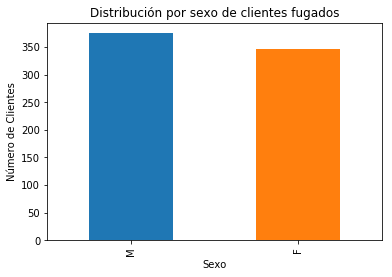

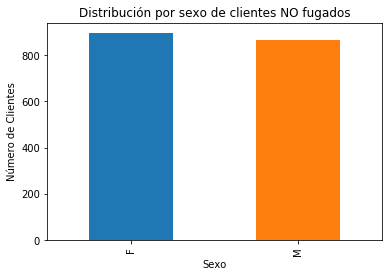

In [171]:
#Se importa librería para crear gráficos
import matplotlib.pyplot as plt

#Código para generar un diagrama de barras. Se busca que en el mismo resultado esté la distribución de clientes
#fugados y NO fugados para comparar el comportamiento.

counts=fugados['SEXO'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por sexo de clientes fugados')
plt.ylabel('Número de Clientes')
plt.xlabel('Sexo')
plt.show()



counts=no_fugados['SEXO'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por sexo de clientes NO fugados')
plt.ylabel('Número de Clientes')
plt.xlabel('Sexo')
plt.show()

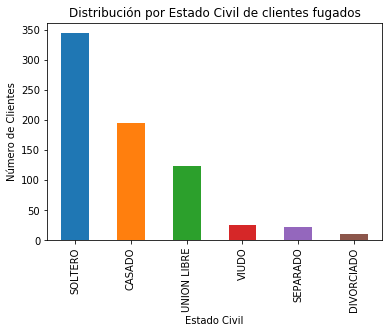

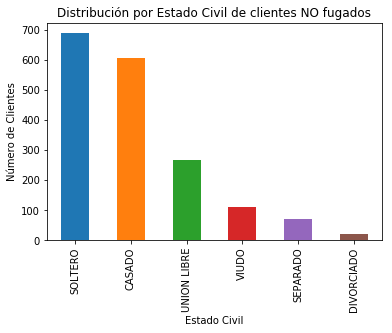

In [172]:
counts=fugados['ESTADO_CIVIL'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por Estado Civil de clientes fugados')
plt.ylabel('Número de Clientes')
plt.xlabel('Estado Civil')
plt.show()

counts=no_fugados['ESTADO_CIVIL'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por Estado Civil de clientes NO fugados')
plt.ylabel('Número de Clientes')
plt.xlabel('Estado Civil')
plt.show()


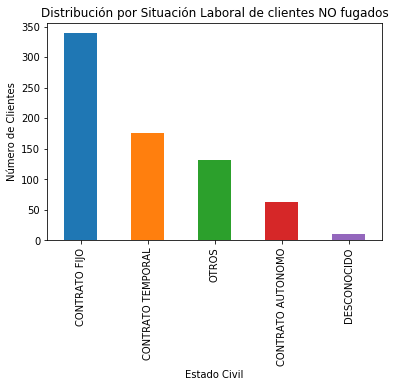

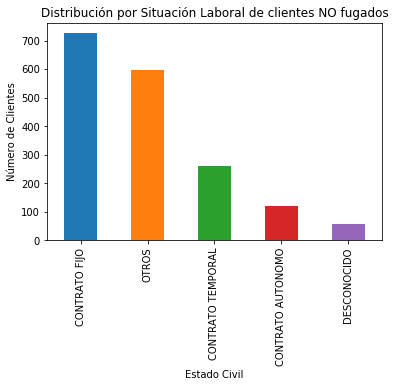

In [173]:
counts=fugados['SITUACION_LABORAL'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por Situación Laboral de clientes NO fugados')
plt.ylabel('Número de Clientes')
plt.xlabel('Estado Civil')
plt.show()

counts=no_fugados['SITUACION_LABORAL'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por Situación Laboral de clientes NO fugados')
plt.ylabel('Número de Clientes')
plt.xlabel('Estado Civil')
plt.show()

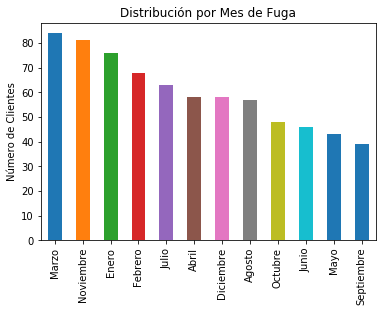

In [174]:
#Se reemplazó la numeración de número de meses por el nombre completo, para mayor claridad en la presentación de resultados.

meses=('Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre')
meses2=('1','2','3','4','5','6','7','8','9','10','11','12')
fugados['MES_DE_FUGA']=fugados['MES_DE_FUGA'].replace(meses2,meses)

counts=fugados['MES_DE_FUGA'].value_counts()
counts.plot(kind='bar')
plt.title('Distribución por Mes de Fuga')
plt.ylabel('Número de Clientes')
plt.show()

(array([  1.,   1.,   4.,  68.,  54.,  77.,  47.,  73., 137., 259.]),
 array([725339. , 726437.5, 727536. , 728634.5, 729733. , 730831.5,
        731930. , 733028.5, 734127. , 735225.5, 736324. ]),
 <a list of 10 Patch objects>)

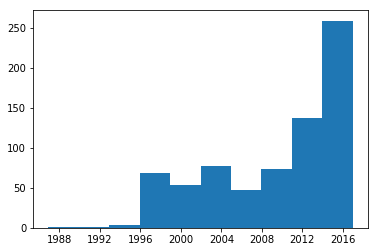

In [175]:
plt.hist(fugados['FECHA_ALTA'])

(array([  4.,   1.,   1.,   1.,   5., 204., 364., 228., 347., 606.]),
 array([719194., 720906., 722618., 724330., 726042., 727754., 729466.,
        731178., 732890., 734602., 736314.]),
 <a list of 10 Patch objects>)

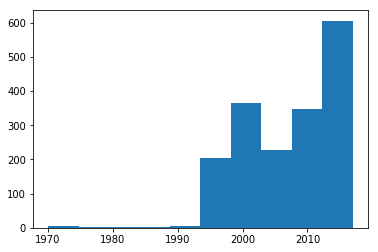

In [176]:
plt.hist(no_fugados['FECHA_ALTA'])

(array([  5.,  14.,  29.,  56.,  95., 113., 129., 162., 112.,   6.]),
 array([701904. , 705019.2, 708134.4, 711249.6, 714364.8, 717480. ,
        720595.2, 723710.4, 726825.6, 729940.8, 733056. ]),
 <a list of 10 Patch objects>)

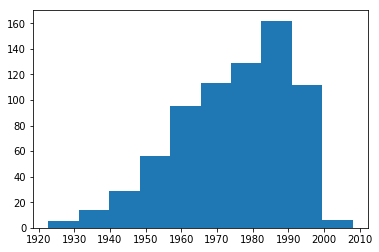

In [177]:
plt.hist(fugados['FECHA_NACIMIENTO'])

(array([  5.,  43., 154., 294., 273., 287., 351., 311.,  32.,  11.]),
 array([699527. , 703140.5, 706754. , 710367.5, 713981. , 717594.5,
        721208. , 724821.5, 728435. , 732048.5, 735662. ]),
 <a list of 10 Patch objects>)

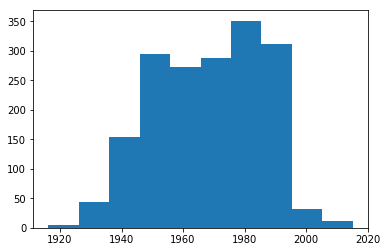

In [178]:
plt.hist(no_fugados['FECHA_NACIMIENTO'])